 # Homework 1

Daniil Sherki

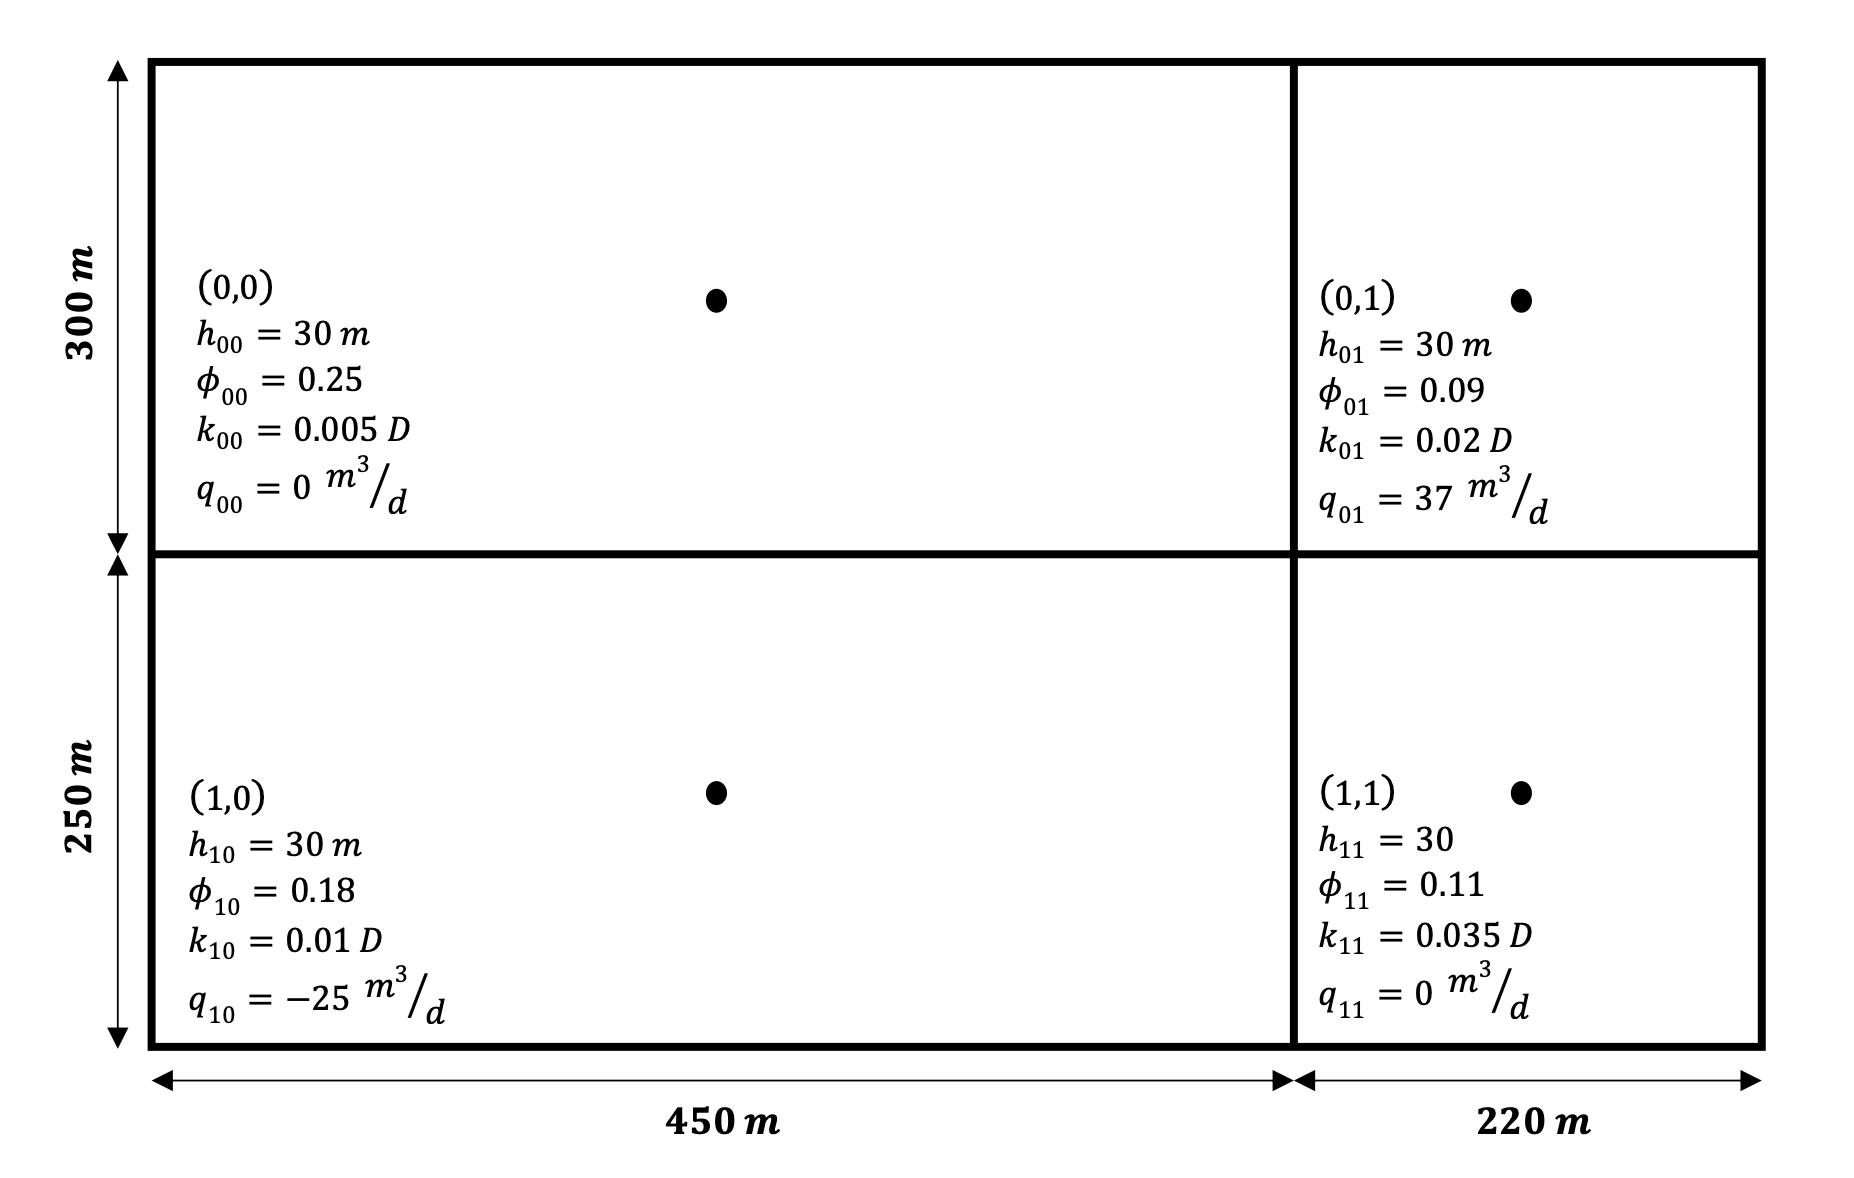

**Figure 1:** The Illustrated Reservoir (top view)

Figure 1 shows a reservoir, represented by four-block grid. The rock fluid system has an effective compressibility of $10^{-6}$ [kPa$^{-1}$]. The oil in-place has a viscosity of 2.5 [mPa$\cdot$s]. The initial reservoir pressure is constant at 27 [MPa].



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
P0 = 27*10**6       #Pa
c = 10**(-9)        #Pa^(-1)
mu = 2.5*10**(-3) #Pa*s
h = [30, 30, 30, 30]
indexes = ['00', '01', '10', '11']
y = [300,300, 250, 250]
x = [450, 220, 450, 220]
phi = [0.25, 0.09, 0.18, 0.11]
k_mD = [0.005, 0.02, 0.01, 0.035]
k = np.array(k_mD)*0.9869*10**(-12)
k = k.tolist()
q_m3d = [0, 37, -25, 0]
q = np.array(q_m3d)/24/60/60
q = q.tolist()

df = pd.DataFrame({'x': x,
                   'y': y,
                   'phi': phi,
                   'h': h,
                   'k': k,
                   'q': q},
                  index = indexes)

df

,x,y,phi,h,k,q
00,450,300,0.25,30,4.934500e-15,0.000000
01,220,300,0.09,30,1.973800e-14,0.000428
10,450,250,0.18,30,9.869000e-15,-0.000289
11,220,250,0.11,30,3.454150e-14,0.000000


# Task 1

Set up and write down the equations for explicit and implicit schemes in a general form. Write down equations for computing transmissibility in **x** and **y** directions in a general form.

## Solution

**Equations for explicit and implicit schemes in a general form:**

**Explicit scheme:**
time level = n:
$$T_{i+1/2}(P^n_{i+1} - P^n_{i}) - T_{i-1/2}(P^n_{i} - P^n_{i-1})+q^*_i = \frac{c\phi_i V_{bi}}{\Delta t} (P^{n+1}_i - P^n_i) \tag{1}$$

$$ P^{n+1}_i =  P^n_i  + \frac{\Delta t}{c\phi_i V_{bi}} \left[T_{i+1/2}(P^n_{i+1} - P^n_{i})- T_{i-1/2}(P^n_{i} - P^n_{i-1}) \right] \tag{2} $$

**Implicit scheme:**

time level = n+1:

$$T_{i+1/2}(P^{n+1}_{i+1} - P^{n+1}_{i}) - T_{i-1/2}(P^{n+1}_{i} - P^{n+1}_{i-1}) +  q^*_i = \frac{c\phi_i V_{bi}}{\Delta t} (P^{n+1}_i - P^n_i ) \tag{3}$$


where $T_{i+1/2}$ - transmissibility between neighbour blocks; $P^n_{i}$ - Pressure in i-th block at time level n; $c$ - compressibility of system; $\phi_i$ - porosity of i-th block; $V_{bi}$ - volume of i-th block; $\Delta t$ - time step.

**Equations for computing transmissibility in x and y directions in a general form:**

**For $\mathbf{x}$:**
$$T_{i+1/2,j} = \frac{2A_{i,j} k_{i,j} A_{i+1, j} k_{i+1, j}}{A_{i,j} k_{i,j} \Delta x_{i+1, j} + A_{i+1, j} k_{i+1, j}\Delta x_{i, j}} \frac{1}{\mu} \tag{4}$$

**For $\mathbf{y}$:**
$$T_{i,j+1/2} = \frac{2A_{i,j} k_{i,j} A_{i, j+1} k_{i, j+1}}{A_{i,j} k_{i,j} \Delta y_{i, j+1} + A_{i, j+1} k_{i, j+1}\Delta y_{i, j}} \frac{1}{\mu} \tag{5}$$

where $A_{i,j}$ - cross-section of block; $k_{i,j}$ - permeability of block; $\mu$ - fluid viscosity.


# Task 2
Write down the values for transmissibility in x and y directions in case of Neumann boundary conditions. Please, explain the difference between Dirichlet and Neumann boundary conditions using the Figure 1

## Solution

**For $\mathbf{x}$:**
$$T_{i+1/2,j} = \begin{cases} 0 & \text{if } i = 0 \text{ or } i = N_x \\ \frac{2A_{i,j} k_{i,j} A_{i+1, j} k_{i+1, j}}{A_{i,j} k_{i,j} \Delta x_{i+1, j} + A_{i+1, j} k_{i+1, j}\Delta x_{i, j}} \frac{1}{\mu} & \text{otherwise} \end{cases} \tag{6}$$

**For $\mathbf{y}$:**
$$T_{i,j+1/2} = \begin{cases} 0 & \text{if } j = 0 \text{ or } j = N_y \\ \frac{2A_{i,j} k_{i,j} A_{i, j+1} k_{i, j+1}}{A_{i,j} k_{i,j} \Delta y_{i, j+1} + A_{i, j+1} k_{i, j+1}\Delta y_{i, j}} \frac{1}{\mu} & \text{otherwise} \end{cases} \tag{7}$$

where $N_x$ and $N_y$ are the number of blocks in x and y directions.

# Task 3

Compute $\Delta t$ for stability of the explicit scheme in case of Neumann boundary conditions.

## Solution


In [3]:
df['Ax'] = df['x'] * df['h']
df['Ay'] = df['y'] * df['h']

def calculate_T(i, j, direction, mu=mu):
    '''
    The function, which calculate transmissibillity T from i ['..'] cell to j ['..'] cell,
    using direction x or y (and nothing else!)
    :param i: str;
    :param j: str;
    :param direction: str or int;
    :param mu: float;
    :return: float.
    '''
    if direction in ['x', 'X', 0]:
        A = 'Ay'
        d = 'x'
    elif direction in ['y', 'Y', 1]:
        A = 'Ax'
        d = 'y'
    else: raise ValueError("Pls don't enter incorrect direction 👉👈🥺")


    T= 2 * df[A].loc[i] * df['k'].loc[i] * df[A].loc[j] * df['k'].loc[j] \
    / (df[A].loc[i] * df['k'].loc[i] * df[d].loc[j] + df[A].loc[j] * df['k'].loc[j] * df[d].loc[i]) / mu

    return T

Tx, Ty = [], []
for T, dir, arr in zip([Tx, Ty],['x','y'],
                       [['01', '00', '11', '10'],
                        ['10', '11', '00', '01']]):
    for i,j in zip(['00', '01', '10', '11'], arr):
        T.append(calculate_T(i,j, dir))


df['Tx'] = Tx
df['Ty'] = Ty

df['Vb'] = df['x'] * df['y'] * df['h']
df['dt'] = c * df['phi'] * df['Vb'] / (df['Tx'] + df['Ty']) / 60 / 60 / 24
df


,x,y,phi,h,k,q,Ax,Ay,Tx,Ty,Vb,dt
00,450,300,0.25,30,4.934500e-15,0.000000,13500,9000,7.035327e-11,1.253944e-10,4050000,59.866628
01,220,300,0.09,30,1.973800e-14,0.000428,6600,9000,7.035327e-11,2.353279e-10,1980000,6.747226
10,450,250,0.18,30,9.869000e-15,-0.000289,13500,7500,1.154591e-10,1.253944e-10,3375000,29.193069
11,220,250,0.11,30,3.454150e-14,0.000000,6600,7500,1.154591e-10,2.353279e-10,1650000,5.988519


In [4]:
print(f'The minimum dt is min {min(df.dt) :.2f} days')

The minimum dt is min 5.99 days


# Task 4

Assuming Neumann boundary conditions, implement function that calculates the pressure distribution over time for all cells (depicted in the Figure 1) using explicit scheme until time $t$ = 250 days. Choose two different timestamps:

1. $\Delta t$ = 5 days.
2. $\Delta t$ = 15 days.

## Solution

In [5]:
def explicit_method(df, Ng, t, dt, p0, idxs = ['00', '01', '10', '11']):
    '''
    Explicit method for calculate pressure distribution for Ng cells
    :param df: pandas.DataFrame; // main storage dataframe
    :param Ng: int; // number of cells
    :param t: int; // total time of calculations
    :param dt: float; // time step
    :param p0: flaat; // init pressure
    :param idxs: list; // cells index names
    :return: pandas.DataFrame.
    '''
    p0 = np.ones((Ng, 1), dtype='single') * p0
    p = np.zeros((Ng, int(t/dt)))
    p = np.concatenate((p0, p), axis = 1)
    pdf = pd.DataFrame(p, columns = np.arange(0, t+dt, dt), index = idxs)

    for i in np.arange(0, t, dt):
        pdf[i+dt][0] = (pdf[i][0]+((dt*24*60*60)/c/df['phi'][0]/df['Vb'][0])*\
                (df['Tx'][0]*(pdf[i][1] - pdf[i][0]) + df['Ty'][0]*(pdf[i][2]-pdf[i][0])+\
                 df['q'][0] ))
        pdf[i+dt][1] = (pdf[i][1]+((dt*24*60*60)/c/df['phi'][1]/df['Vb'][1])*\
                (-df['Tx'][1]*(pdf[i][1] - pdf[i][0]) + df['Ty'][1]*(pdf[i][3]-pdf[i][1])+\
                 df['q'][1]))
        pdf[i+dt][2] = (pdf[i][2]+((dt*24*60*60)/c/df['phi'][2]/df['Vb'][2])*\
                (df['Tx'][2]*(pdf[i][3] - pdf[i][2]) - df['Ty'][2]*(pdf[i][2]-pdf[i][0])+\
                 df['q'][2]))
        pdf[i+dt][3] = (pdf[i][3]+((dt*24*60*60)/c/df['phi'][3]/df['Vb'][3])*\
                (-df['Tx'][3]*(pdf[i][3] - pdf[i][2]) - df['Ty'][3]*(pdf[i][3]-pdf[i][1])+\
                 df['q'][3]))
    return pdf



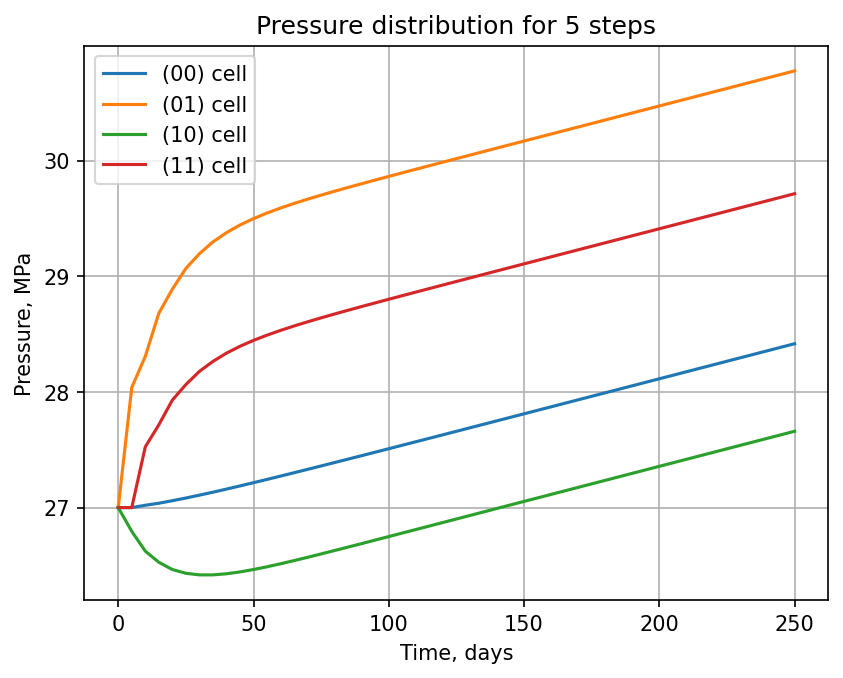

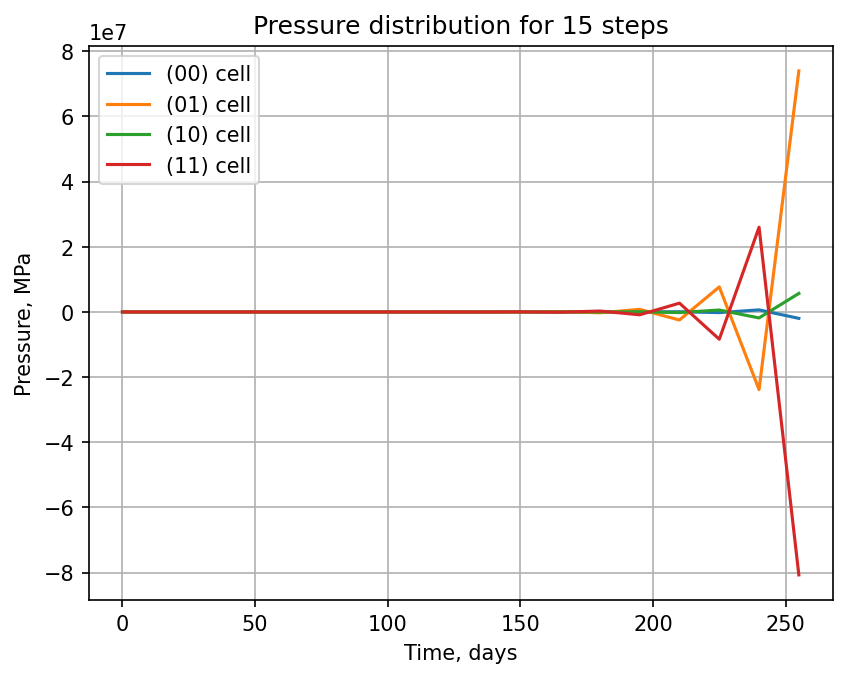

In [6]:
total_time = 250
time_step1 = 5
time_step2 = 15

def plot_pres_dist(pdf, t, dt, log_scale = False, idxs =  ['00', '01', '10', '11']):
    '''
    Plotting the pressure distribution using pressure dataframe
    :param pdf: pandas.DataFrame; // pressure distribution data
    :param t: int; // total time
    :param dt: float; // time step
    :param log_scale: boolean. // log-log scale on/off
    '''
    plt.figure(dpi=150)
    for i in idxs:
        plt.plot(np.arange(0, t+dt, dt), pdf.loc[i]/1e6, label=f'({i}) cell')
    plt.legend()
    plt.grid(True)
    plt.title(f'Pressure distribution for {dt} steps')
    plt.xlabel('Time, days')
    plt.ylabel('Pressure, MPa')
    if log_scale:
        plt.yscale('log')
        plt.xscale('log')
    plt.show()


pdf1 = explicit_method(df, 4, total_time, time_step1, P0)
pdf2 = explicit_method(df, 4, total_time+5, time_step2, P0)
plot_pres_dist(pdf1, t = total_time, dt=time_step1)
plot_pres_dist(pdf2, t = total_time+5, dt=time_step2)


There are no major errors in the LaTeX code provided, but there are some minor formatting issues that can be improved:

# Task 5
Assuming Neumann boundary conditions, calculate the pressure distribution over time for all cells (depicted in Figure 1) using implicit scheme until time $t$ = 250 days if:
1. $\Delta t$ = 5 days;
2. $\Delta t$ = 15 days;
3. $\Delta t$ = 250 days.

## Solution

For this purpose, the following operations should be used:

$$c^n_i P^{n+1}_{i-1} + a^n_{i} P^{n+1}_i + b^n_i P^{n+1}_{i+1} = D^n_i \tag{6}$$

$$\begin{pmatrix}
a_1 & b_1 & 0 & 0 & \cdots & 0 \\
c_2 & a_2 & b_2 & 0 & \cdots & 0 \\
0 & c_3 & a_3 & b_3 & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & c_n & a_n
\end{pmatrix}
\begin{pmatrix}
P_1 \\
P_2 \\
P_3 \\
\vdots \\
P_n
\end{pmatrix} =
\begin{pmatrix}
d_1 \\
d_2 \\
d_3 \\
\vdots \\
d_n
\end{pmatrix}
\tag{7}$$

For the 2D case and 4 cells:

$$\begin{pmatrix}
-T_x-T_y-AT & T_x & T_y & 0 \\
T_x & -T_x-T_y-AT & 0 & T_y \\
T_y & 0 & -T_x-T_y-AT & T_x \\
0 & T_y & T_x & -T_x-T_y-AT
\end{pmatrix}
\begin{pmatrix}
P_1^{n+1} \\
P_2^{n+1} \\
P_3^{n+1} \\
P_4^{n+1}
\end{pmatrix} =
\begin{pmatrix}
-q^*_1 -ATP^n_1 \\
-q^*_2 -ATP^n_2 \\
-q^*_3 -ATP^n_3 \\
-q^*_4 -ATP^n_4
\end{pmatrix}
\tag{8}$$

where $AT = \frac{c\phi_i V_{bi}}{\Delta t}$.

The first component is the coefficient matrix. The second one is the pressure matrix and the third one is the solutions matrix.

In [7]:
def implicit_method(df, Ng, t, dt, p0, idxs =  ['00', '01', '10', '11']):
    '''
    :param df: pandas.DataFrame; // main storage dataframe
    :param Ng: int; // number of cells
    :param t: int; // total time of calculations
    :param dt: float; // time step
    :param p0: flaat; // init pressure
    :param idxs: list; // cells index names
    :return: pandas.DataFrame.
    '''
    p0 = np.ones((1,Ng), dtype='single')*p0
    p = np.zeros((int(t/dt), Ng), dtype = 'single')
    p = np.concatenate((p0, p), axis = 0)
    df['AT'] = (c*df['phi']*df['Vb'])/dt/(24*60*60)

    coef_matrix =  [[-df['Tx'][0]-df['Ty'][0]-df['AT'][0], df['Tx'][0],df['Ty'][0],0],
            [df['Tx'][1],-(df['Tx'][1]+df['Ty'][1])-df['AT'][1], 0,df['Ty'][2]],
            [df['Ty'][2],0,-(df['Tx'][2]+df['Ty'][2])-df['AT'][2], df['Tx'][2]],
            [0, df['Ty'][3],df['Tx'][3],-df['Tx'][3]-df['Ty'][3]-df['AT'][3]]]

    for i in np.arange(1, int(t/dt)+1, 1):
        buf = -df['q']-df['AT']*p[i-1,:]
        p[i] = np.linalg.solve(coef_matrix, buf).T

    p = pd.DataFrame(p.T, index = idxs, columns = np.arange(0, t+dt, dt))
    return p

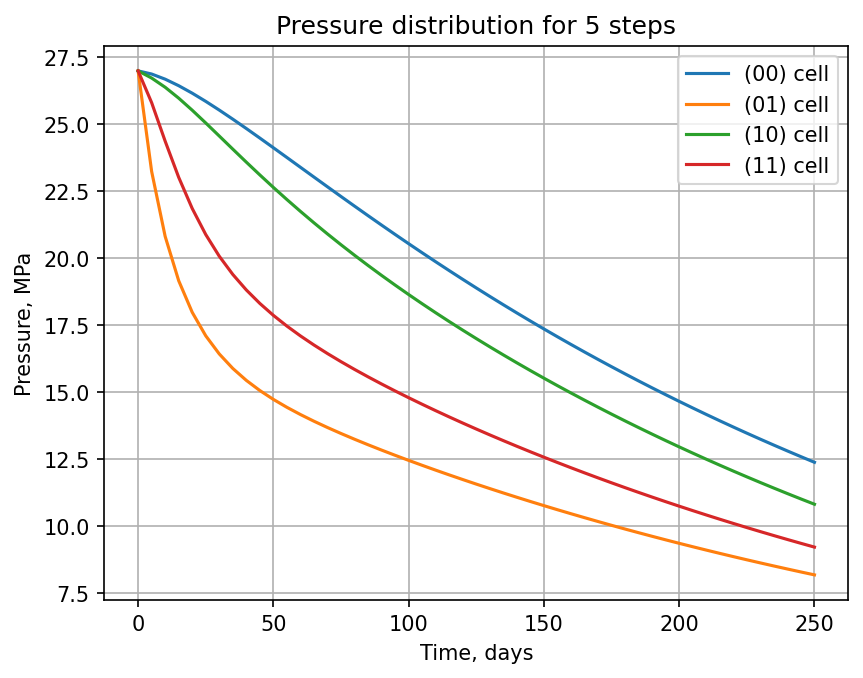

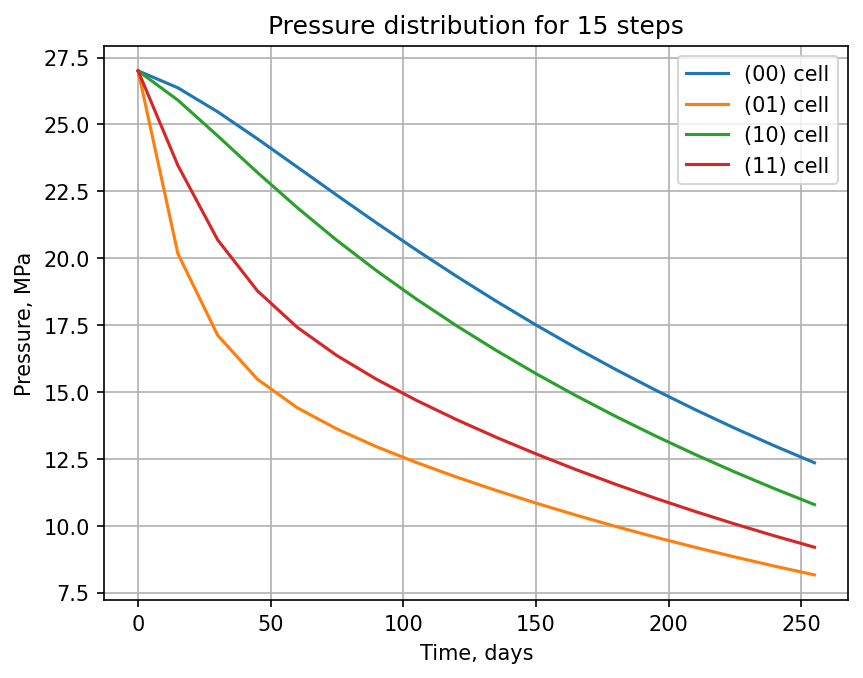

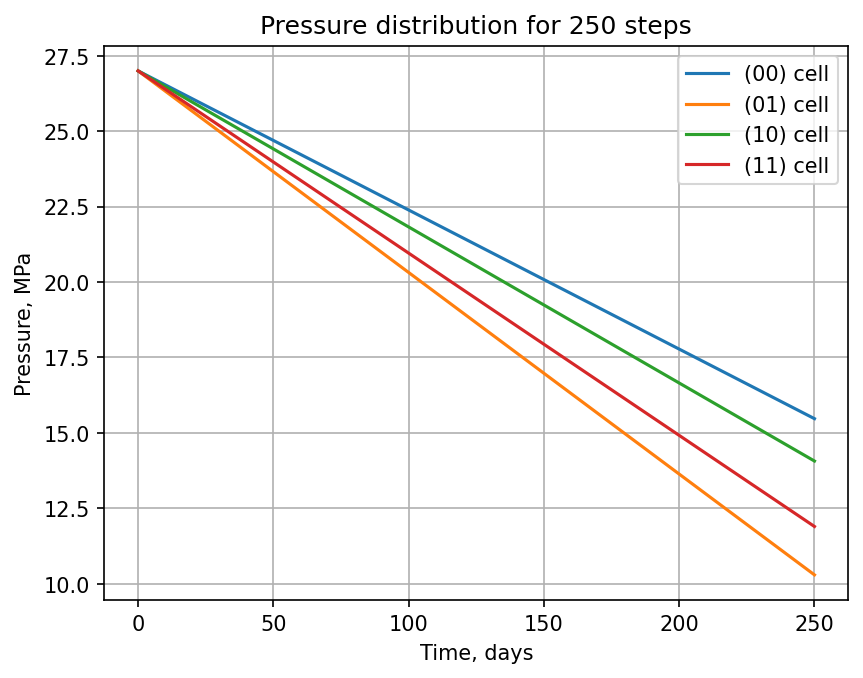

In [8]:
time_step3 = 250
pdf1 = implicit_method(df, 4, total_time, time_step1, P0)
pdf2 = implicit_method(df, 4, total_time+5, time_step2, P0)
pdf3 = implicit_method(df, 4, total_time, time_step3, P0)
plot_pres_dist(pdf1, t = total_time, dt=time_step1)
plot_pres_dist(pdf2, t = total_time+5, dt=time_step2)
plot_pres_dist(pdf3, t = total_time, dt=time_step3)

# Task 6

Assuming Neumann boundary conditions perform Material Balance check in each of the
above cases and comment on stability of the solution when comparing the explicit versus
implicit scheme.

## Solution

In [9]:
def material_balance_check(method, df, Ng, t, dt, p0 = P0, idxs =  ['00', '01', '10', '11']):
    '''
    Check the material balance equation and return df with results for each cell.
    :param method: str; // or int
    :param df: pandas.DataFrame; // main storage dataframe
    :param Ng: int; // number of cells
    :param t: int; // total time of calculations
    :param dt: float; // time step
    :param p0: flaat; // init pressure
    :param idxs: list; // cells index names
    :return: pandas.DataFrame.
    '''
    if method in ['explicit', 'e', 0]:
        pdf = explicit_method(df, Ng, t, dt, p0, idxs)
        title = 'explicit'
    else:
        pdf = implicit_method(df, Ng, t, dt, p0, idxs)
        title = 'implicit'
    df['mat_balance'] = 0
    dt = dt * 24 * 60 * 60
    # for j in range(1, int(t/dt)+1):
    #     df.iloc[j]['mat_balance'] = np.sum(df['A_T']/dt * (pdf.iloc[j] - pdf.iloc[j-1])) / pdf['q'].sum()
    df['mat_balance']=df['AT'] / dt * (pdf - pdf.shift(axis=0)).sum(axis=1) / df['q'].sum()
    print(f"Material balance check: {title} method with time step equaled {dt/24/60/60: .0f} days: {df['mat_balance'].sum() :.10f}")
    return df

df_exp_5 = material_balance_check('e', df, 4, total_time, time_step1)
df_exp_15 = material_balance_check('e', df, 4, total_time+5, time_step2)
df_imp_5 = material_balance_check('i', df, 4, total_time, time_step1)
df_imp_15 = material_balance_check('i', df, 4, total_time+5, time_step2)
df_imp_250 = material_balance_check('i', df, 4, total_time, time_step3)

Material balance check: explicit method with time step equaled  5 days: -0.0000408523
Material balance check: explicit method with time step equaled  15 days: -8.4862935268
Material balance check: implicit method with time step equaled  5 days: 0.0027717332
Material balance check: implicit method with time step equaled  15 days: 0.0001016613
Material balance check: implicit method with time step equaled  250 days: 0.0000000151


# Conclusions

Two numerical methods are used to solve this equation: an explicit method and an implicit method. The explicit method solves the equation by using values of the previous time step, while the implicit method solves the equation by simultaneously solving a set of linear equations.

The stability criteria for the explicit method is a maximum time step of 5.99 days. This means that if the time step is greater than 5.99 days, the solution will be unstable and the results will not be accurate.

The material balance check is a way to verify if the computed solution is physically meaningful. If the material balance check shows a value close to zero, it indicates that the modeled system has mass conservation and the solution is reliable.

The reported results indicate that the material balance checks are satisfactory for both methods with different time steps. For the explicit method, the material balance check shows a increasing trend for error as the time step is increased. This indicates that the explicit method is less accurate for larger time steps.

On the other hand, for the implicit method, the material balance check shows a decreasing trend for error as the time step value is increased. This indicates that the implicit method is more accurate for larger time steps.

The reason for this behavior is related to the numerical stability of each method. The explicit method becomes unstable at larger time steps, while the implicit method remains stable and accurate. Therefore, it is recommended to use the implicit method for larger time steps to obtain more accurate results.